# Perform an A/B Test for ad campaign using python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### Imagine being hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Task one : Load the dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
#load the dataset
df=pd.read_excel('AB Test.xlsx')

In [4]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [5]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 29.4+ KB


# Task Two : Set up the hypothesis testing steps


In [9]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [10]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

### experiment group : 
the group that is involved in the new experiment . i.e the group that received the new ad . 
### Control group : 
the 2nd group that didn't receive the new ad
### Click-through rate (CTR) : 
the number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null Hypothesis.
<br>
2) Specify the Alternative Hypothesis.
<br>
3) Set the Significance Level (a)
<br>
4) Calculate the  Corresponding P-Value.
<br>
5) Drawing a Conclusion



## Task Three : Compute the difference in the click-through rate 

In [26]:
# Get dataframe with all observations from control group 
control_df= df[df['group'] == 'control']
# Compute CTR for control group 

control_ctr= control_df.action[control_df['action'] =='view and click'].count() /control_df['group'].count()
#Display the CTR For the control group
control_ctr

0.19349680170575692

In [32]:
# Get dataframe with all records from experiment group 
experiment_df= df[df['group'] == 'experiment']
# Compute click through rate for experiment group 
experiment_ctr= experiment_df.action[experiment_df['action'] == 'view and click'].count() /experiment_df['group'].count()
#Display the CTR For the experiment group
experiment_ctr

0.16586921850079744

In [33]:
#Compute the difference in the CTR 
diff=experiment_ctr-control_ctr
#display the difference 
diff

-0.027627583204959477

# Task four : create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [34]:
#bootsrapping
differences=[]
size= df.shape[0]
for iteration in range(10000):
    sample = df.sample(size, replace=True)
    control_df= sample[sample['group'] == 'control']
    experiment_df = sample[sample['group']=='experiment']
    control_ctr= control_df.action[control_df['action'] =='view and click'].count() /control_df['group'].count()
    experiment_ctr=experiment_df.action[experiment_df['action'] =='view and click'].count() /experiment_df['group'].count()
    differences.append(experiment_ctr-control_ctr)

In [35]:
differences

[-0.0382867906859152,
 -0.024584477525653986,
 -0.0016674431442695314,
 -0.03757815910160259,
 -0.008016572722455095,
 -0.015590922487474235,
 -0.05110667669230917,
 -0.030548052226573863,
 -0.022628647378797773,
 -0.02066290889820302,
 -0.01294403727447413,
 -0.02960235465353539,
 -0.03376492250896568,
 -0.045070992581037195,
 -0.05166069855779204,
 -0.03317490548177371,
 -0.04977414162482005,
 -0.04300342941359861,
 -0.020467350687582153,
 -0.0265789854025148,
 -0.03777878447782074,
 -0.009723217362912429,
 -0.004663898297878388,
 -0.0452264271139598,
 -0.03919374710703297,
 0.0039090782807879865,
 -0.03528031979538898,
 -0.05022898729800657,
 -0.03913359017755136,
 -0.02117628854234152,
 -0.037748062094592916,
 -0.023634143381055933,
 -0.039052368709814905,
 -0.0174526317699068,
 -0.02402637087026821,
 -0.01992222815871536,
 -0.01883334060693584,
 -0.030502313696949918,
 -0.01969347629686813,
 -0.03758819298129262,
 -0.05017198794241168,
 -0.022319019350859615,
 -0.01095503436767947

# Task five : Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([   7.,   89.,  445., 1490., 2587., 2948., 1715.,  598.,  110.,
          11.]),
 array([-0.07675751, -0.06710414, -0.05745077, -0.04779739, -0.03814402,
        -0.02849064, -0.01883727, -0.00918389,  0.00046948,  0.01012285,
         0.01977623]),
 <BarContainer object of 10 artists>)

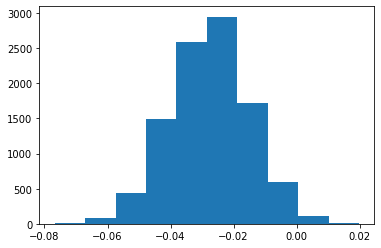

In [36]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences)

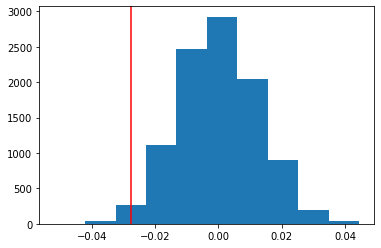

In [39]:
#simulate the distribution under the null hypothesis 

null_hypothesis= np.random.normal(0,differences.std(),differences.size)

#plot the null distribution 
plt.hist(null_hypothesis)
plt.axvline(diff,c='red')

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [41]:
# Compute the  P-value 
(null_hypothesis>diff).mean()

0.988